<a href="https://colab.research.google.com/github/ChenxiLiu8/ANLY590/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random

# **Feedforward: Building a ReLU neural network**

## **1.1**

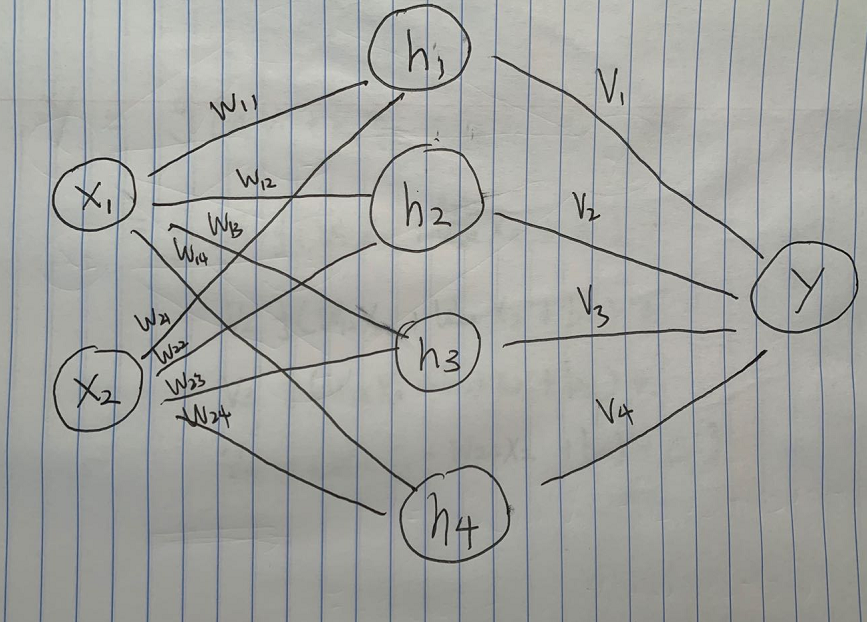


## **1.2**

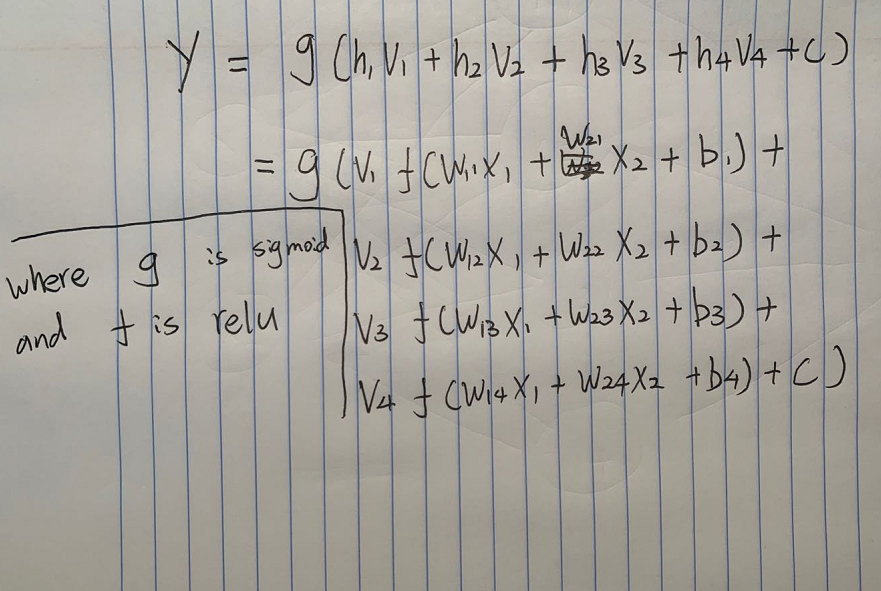

## **1.3**

In [2]:
def relu(z):
  return np.maximum(0, z)
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [3]:
def ff_nn_relu(x,W,V,b,c):
  h = relu(np.dot(x, W)+b)
  y = sigmoid(np.dot(h, V)+c)
  return y 


## **1.4**

In [4]:
X = np.array([[1, -1], [0, -1], [0, 1]], np.float64).reshape((3,2))
W = np.array([[1, -1, 0, 1], [0, 0, 0.5, 1]], np.float64).reshape(2,4)
b = np.array([0, 0, 1, 0], np.float64).reshape(1,4)
c = np.array([1], np.float64)
V = np.array([[1], [0], [-1], [1]], np.float64).reshape(4,1)

In [5]:
ff_nn_relu(X,W,V,b,c).reshape(1,3)

array([[0.81757448, 0.62245933, 0.62245933]])

# **Gradient Descent**

## **2.1**

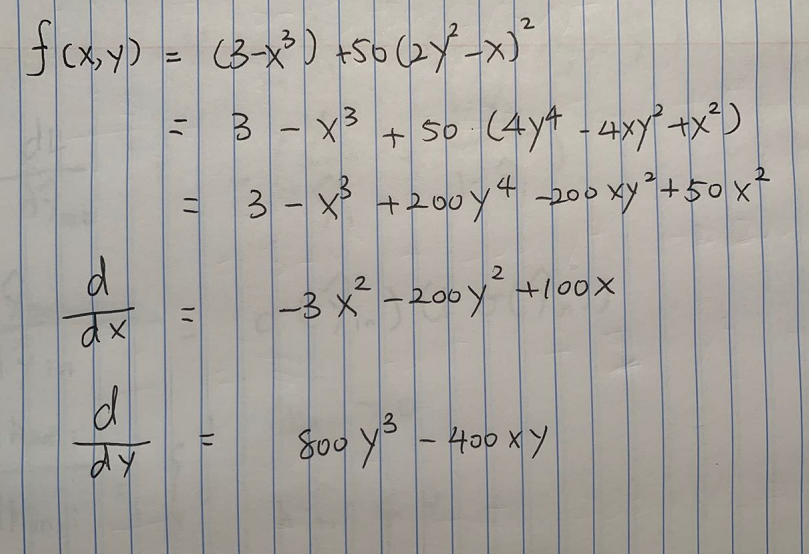

## **2.2**

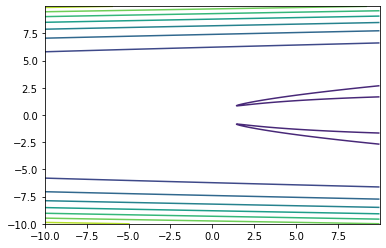

In [6]:
delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3)+50*(2*Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

## **2.3**

In [7]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 + 200*y**2 +100*x
    df_dy = 800*y**3 - 400*x*y
    return np.array([df_dx, df_dy])

In [8]:

def grad_descent(starting_point, iterations, learning_rate):
  if starting_point is None:
    point = np.random.uniform(-10,10, size=2)
  else: 
    point = starting_point
  return_list = [point]
  for i in range(iterations):
    grad = grad_f(point)
    point = point - learning_rate*grad
    return_list.append(point)
  return np.array(return_list)

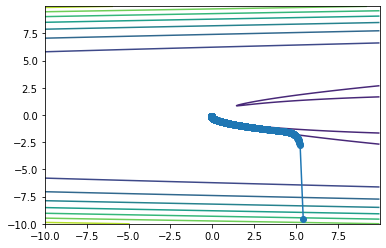

In [9]:
np.random.seed(10)
traj = grad_descent(None, 10000, 0.00001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

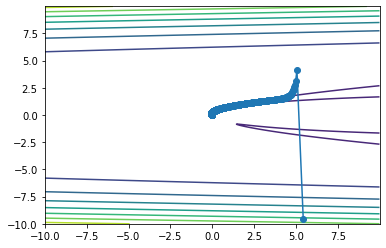

In [10]:
np.random.seed(10)
traj = grad_descent(None, 10000, 0.00002)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

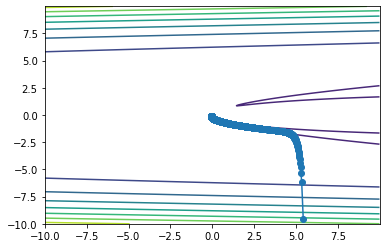

In [11]:
np.random.seed(10)
traj = grad_descent(None, 10000, 0.000005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## **2.4**

In [12]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
  if starting_point is None:
    point = np.random.uniform(-10,10, size=2)
  else: 
    point = starting_point
  return_list = [point]
  v = np.zeros(point.size)
  for i in range(iterations):
    grad = grad_f(point)
    v = alpha*v + epsilon*grad
    point = point - v
    return_list.append(point)
  return np.array(return_list)

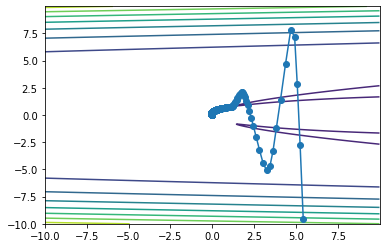

In [13]:

np.random.seed(10)
traj = grad_descent_with_momentum(iterations=10000, epsilon=0.00001, alpha=.8)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

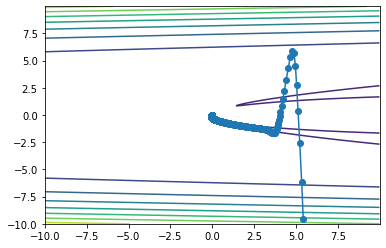

In [14]:

np.random.seed(10)
traj = grad_descent_with_momentum(iterations=10000, epsilon=0.000005, alpha=.8)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

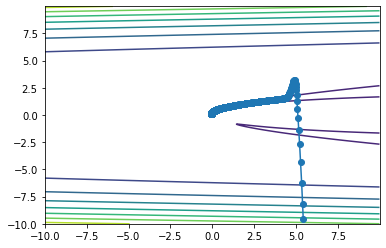

In [15]:

np.random.seed(10)
traj = grad_descent_with_momentum(iterations=10000, epsilon=0.000002, alpha=.8)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

# **Backprop**

## **3.1**

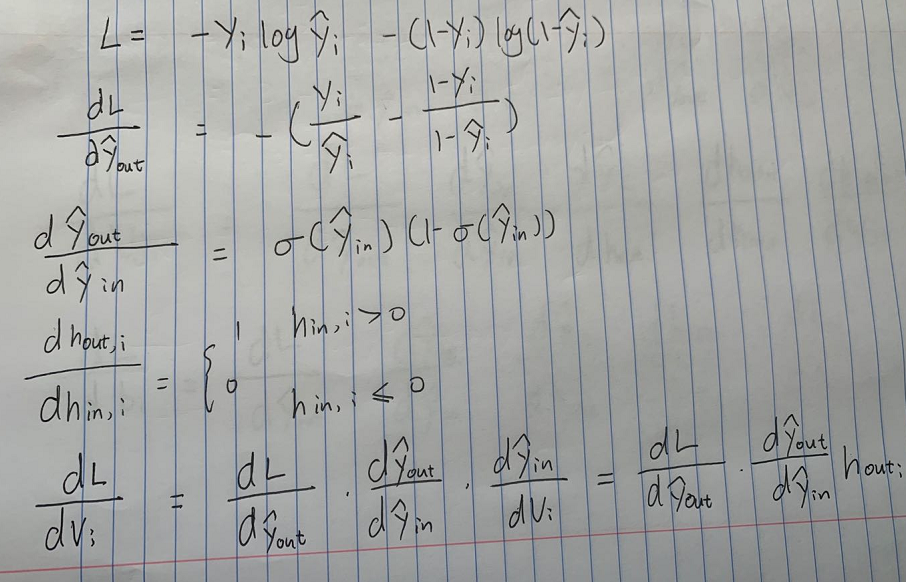

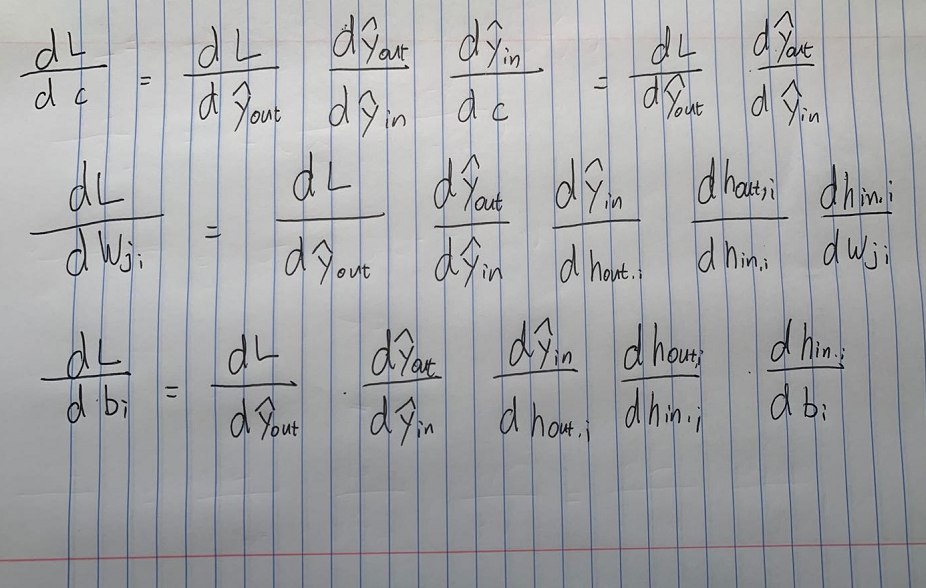

## **3.2**

In [16]:
def loss_func(y, yhat):
    return -(y * np.log(yhat) + (1 - y) * np.log(1 - yhat)).sum(),  -(y/yhat - (1-y)/(1-yhat))

In [17]:
def relu_d(x):
    return np.where(x>0, 1, 0)

In [18]:
def grad_f(x, y,model_params):
    W, V, b, c = model_params
    yhat = ff_nn_relu(x, W, V, b, c)
    loss, d_loss= loss_func(y, yhat)
    h = relu(np.dot(x,W) + b)
    dc = d_loss * sigmoid(np.dot(h, V) + c)*(1 - sigmoid(np.dot(h,V) + c))
    dV = np.dot(dc.T, h).T
    db = np.where(np.dot(x,W)+b>0, 1, 0) * np.dot(d_loss, V.T)
    dW = np.dot(x.T, db)
    return loss, np.average(dc, axis=0), dV, np.average(db, axis=0), dW

## **3.3**

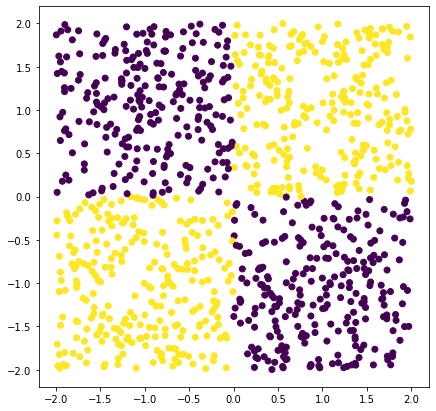

In [19]:
N = 1000
def binary_classification_data(N):
    x = np.random.uniform(low=-2, high=2, size=(N, 2))
    y = np.where(x[:, 0] * x[:, 1] >0 , 1, 0)
    return x, y

x,y = binary_classification_data(N)
plt.figure(figsize=(7, 7))
plt.scatter(x[:, 0], x[:, 1],  c=y)
plt.show()

## **3.4**

In [20]:
def grad_descent(x, y, model_params, iters, alpha):
    W, V, b, c = model_params
    losses = []
    params = np.array([W, V, b, c])
    for i in range(iters):
        loss, dc, dV, db, dW = grad_f(x, y, model_params)
        losses.append(loss)
        grads = np.array([dW, dV, db, dc])
        params = params - grads * alpha
        model_params = params
    return losses, model_params

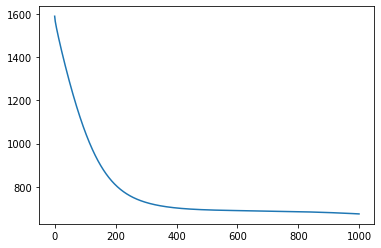

In [30]:
W = np.random.uniform(size=8).reshape(2,4)
V = np.random.uniform(size=4).reshape(4,1)
b = np.random.uniform(size=4).reshape(1,4)
c = np.random.uniform(size=1).reshape(1,1)
iters = 1000
learning_rate = 0.00001
Y = np.where(y, 1, 0).reshape(1000,1)
model_params = (W, V, b, c)
loss, _ = grad_descent(x, Y, (W,V,b,c), iters, learning_rate)
plt.plot(loss,'-')

## **3.5**

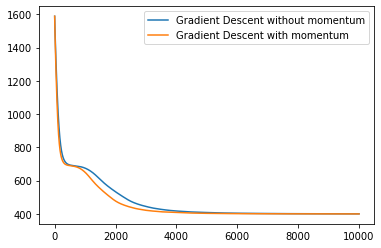

In [36]:
# same as previous question adding velocity 
def gradient_descent_momentum(x, y, model_params, iters, learning_rate, alpha):
    W, V, b, c = model_params
    losses = []
    params = np.array([W,V,b,c])
    # initialize velocity array
    velocity = np.array([np.zeros(W.shape), np.zeros(V.shape), np.zeros(b.shape), np.zeros(c.shape)])
    for i in range(iters):
        loss, dc, dV, db, dW = grad_f(x,y, model_params)
        losses.append(loss)
        grads = np.array([dW, dV, db, dc])
        velocity = alpha*velocity+learning_rate*grads
        params = params-velocity
        model_params = params
    return losses, params

iters = 10000
learning_rate = 0.00001
alpha = 0.2
Y = np.where(y, 1, 0).reshape(1000,1)
model_params = (W, V, b, c)
loss, _ = grad_descent(x, Y, model_params, iters, learning_rate)
loss_m, _ = gradient_descent_momentum(x, Y, model_params, iters, learning_rate, alpha)
plt.plot(loss,'-', label = 'Gradient Descent without momentum')
plt.plot(loss_m, '-', label = 'Gradient Descent with momentum')
plt.legend(loc = "upper right")

## **3.6**

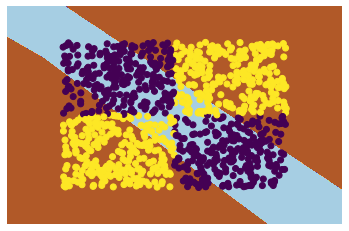

In [35]:
def plot_decision_boundaries(X, Y, model_params):
    W, V, b, c = model_params
    # create grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01  # step size 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    xs = np.c_[xx.ravel(), yy.ravel()]
    Z = ff_nn_relu(xs, W, V, b, c)
    # if bigger than 0.5 classift as 1
    Z = np.where(Z>= 0.5, 1, 0)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')
    plt.scatter(X[:, 0], X[:, 1], c=Y)

plot_decision_boundaries(x, y, model_params_m)